In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import random
np.random.seed(1)

In [2]:
#https://www.kaggle.com/datasets/drgilermo/face-images-with-marked-landmark-points?select=facial_keypoints.csv
X = np.load('face_images.npz')['face_images']
#Use 80% for training, 10% for validation and 10% for testing
m = int(0.8 * X.shape[2])
x_train = X[:,:,:m].transpose(2,0,1)[:,:,:,np.newaxis]
x_val = X[:,:,m: m + int(0.1*X.shape[2])].transpose(2,0,1)[:,:,:,np.newaxis]
x_test = X[:,:, m + int(0.1*X.shape[2]):].transpose(2,0,1)[:,:,:,np.newaxis]
print('x_train:',x_train.shape)
print('x_val:',x_val.shape)
print('x_test:', x_test.shape)

x_train: (5639, 96, 96, 1)
x_val: (704, 96, 96, 1)
x_test: (706, 96, 96, 1)


In [3]:
dfY = pd.read_csv('./facial_keypoints.csv')
dfY.describe()
dfY[['left_eye_center_x','right_eye_center_x','left_eye_center_y','right_eye_center_y']].describe()

,left_eye_center_x,right_eye_center_x,left_eye_center_y,right_eye_center_y
count,7039.000000,7036.000000,7039.000000,7036.000000
mean,66.359021,30.306102,37.651234,37.976943
std,3.448233,3.083230,3.152926,3.033621
min,22.763345,0.686592,1.616512,4.091264
25%,65.082895,28.783339,35.900451,36.327681
50%,66.497566,30.251378,37.528055,37.813273
75%,68.024752,31.768334,39.258449,39.566729
max,94.689280,85.039381,80.502649,81.270911


In [4]:
Y = dfY[['left_eye_center_x','right_eye_center_x','left_eye_center_y','right_eye_center_y']].to_numpy()
y_train = Y[:m,:]
y_val = Y[m: m + int(0.1*Y.shape[0]),:]
y_test = Y[m + int(0.1*Y.shape[0]):,:]
print('y_train:', y_train.shape)
print('y_val:', y_val.shape)
print('y_test:', y_test.shape)

y_train: (5639, 4)
y_val: (704, 4)
y_test: (706, 4)


In [5]:
print('There are {} training examples and {} testing examples'.format(x_train.shape[0], x_test.shape[0]))
print('Each image is of size: {} x {}'.format(x_train.shape[1], x_train.shape[2]))
print('Each label is of size: {}'.format(y_train.shape[1]))

There are 5639 training examples and 706 testing examples
Each image is of size: 96 x 96
Each label is of size: 4


Left eye center: (66.55,37.62)
Right eye center: (27.63,36.38)


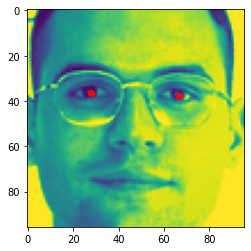

In [6]:
index = random.randint(0, x_train.shape[0])
plt.imshow(x_train[index,:,:,0])
plt.scatter(y_train[index,0], y_train[index,2], c='r')
plt.scatter(y_train[index,1], y_train[index,3], c='r')
print('Left eye center: ({:.2f},{:.2f})'.format(y_train[index,0], y_train[index,2]))
print('Right eye center: ({:.2f},{:.2f})'.format(y_train[index,1], y_train[index,3]))
plt.show()

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(1, (3,3), activation='relu', input_shape=(96, 96, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4)
])

In [8]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss= tf.keras.losses.MeanSquaredError(), metrics=['accuracy'])
model.fit(x_train[0:70,:], y_train[0:70,:], epochs=300)

Epoch 1/300
3/3 [==============================] - 0s 14ms/step - loss: 174001859067904.0000 - accuracy: 0.8429
Epoch 2/300
3/3 [==============================] - 0s 14ms/step - loss: 3319262741145369354174464.0000 - accuracy: 0.4571
Epoch 3/300
3/3 [==============================] - 0s 13ms/step - loss: 13850085441338792214528.0000 - accuracy: 0.0000e+00
Epoch 4/300
3/3 [==============================] - 0s 13ms/step - loss: 10181085015613248634880.0000 - accuracy: 0.0000e+00
Epoch 5/300
3/3 [==============================] - 0s 14ms/step - loss: 7484034572968202862592.0000 - accuracy: 0.0000e+00
Epoch 6/300
3/3 [==============================] - 0s 14ms/step - loss: 5501452626657768636416.0000 - accuracy: 0.0000e+00
Epoch 7/300
3/3 [==============================] - 0s 16ms/step - loss: 4044073150541887176704.0000 - accuracy: 0.0000e+00
Epoch 8/300
3/3 [==============================] - 0s 16ms/step - loss: 2972765315432294907904.0000 - accuracy: 0.0000e+00
Epoch 9/300
3/3 [=========

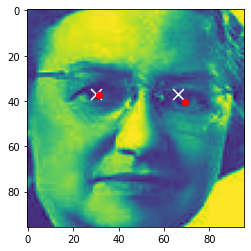

Left eye center as predicted: (66.29,37.03)
Right eye center as predicted: (30.07,36.88)
Left eye center: (69.41,40.50)
Right eye center: (31.23,37.21)
Loss: 5.80
Prediction: marked with X
True value: marked with O


In [18]:
#Try one random picture prediction
index = random.randint(0, x_test.shape[0])
plt.imshow(x_test[index,:,:])
prediction = model.predict(x_test[index:index+1,:,:], verbose = 0)
plt.scatter(prediction[0,0], prediction[0,2], c='white', marker='x', s=120)
plt.scatter(prediction[0,1], prediction[0,3], c='white', marker='x', s=120)
plt.scatter(y_test[index,0], y_test[index,2], c='r', marker='o', s= 40)
plt.scatter(y_test[index,1], y_test[index,3], c='r', marker='o', s= 40)
plt.show()
print('Left eye center as predicted: ({:.2f},{:.2f})'.format(prediction[0,0], prediction[0,2]))
print('Right eye center as predicted: ({:.2f},{:.2f})'.format(prediction[0,1], prediction[0,3]))
print('Left eye center: ({:.2f},{:.2f})'.format(y_test[index,0], y_test[index,2]))
print('Right eye center: ({:.2f},{:.2f})'.format(y_test[index,1], y_test[index,3]))
print('Loss: {:.2f}'.format(tf.keras.losses.MeanSquaredError()(y_test[index:index+1,:], prediction).numpy()))
print('Prediction: marked with X')
print('True value: marked with O')

In [10]:
_, train_accuracy = model.evaluate(x_train, y_train)
_, test_accuracy = model.evaluate(x_test, y_test)
print("Train Accuracy = %.2f" % (train_accuracy*100),'%')
print("Test Accuracy = %.2f" % (test_accuracy*100),'%')

23/23 [==============================] - 0s 8ms/step - loss: 13.9057 - accuracy: 0.9958
Train Accuracy = 99.45 %
Test Accuracy = 99.58 %
